In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import random
from datetime import datetime
from pathlib import Path

In [59]:
opcion_fuente = int(input("(1=Ruta) (2=Transportista)"))

file_name = ""
if opcion_fuente == 1:
    file_name = "archivo_ruta.csv"
else:
    file_name = "archivo_transportista.csv"

In [60]:
# Eliminar "comas" por "espacio en blanco" y "punto y coma" por "coma"
# Abrir, leer y modificar el contenido del archivo
with open(f'{file_name}', "r", encoding="utf-8") as f:
    contenido = f.read()

# Reemplazos: primero las comas por espacio, luego los puntos y coma por coma
contenido = contenido.replace(",", " ")
contenido = contenido.replace(";", ",")

# Guardar el contenido modificado en un nuevo archivo (o sobrescribir el original si quieres)
with open("rechazos_ruta.csv", "w", encoding="utf-8") as f:
    f.write(contenido)

In [61]:
# ATENCION /.\: Puede que no lea el csv si hay comas entre nombres de transportistas, etc (ELIMINAR LAS COMAS PRIMERO)
ruta = pd.read_csv('rechazos_ruta.csv')
print(ruta.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411 entries, 0 to 11410
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Tipo de Reparto                 11411 non-null  object 
 1   Código Locación                 11411 non-null  int64  
 2   Locación                        11411 non-null  object 
 3   Código de Transportista         11411 non-null  int64  
 4   Transportista                   11411 non-null  object 
 5   Orden de Carga                  11410 non-null  float64
 6   Nro Viaje                       11410 non-null  float64
 7   Placa de Vehículo               11410 non-null  object 
 8   Guía de Transportista           11410 non-null  float64
 9   Fecha                           11411 non-null  object 
 10  Carga Total CF                  11410 non-null  float64
 11  Redondeo CF                     11410 non-null  float64
 12  CF Programada                   

In [62]:
# eliminar todas las columnas excepto las relevantes
if opcion_fuente == 1:
    ruta = ruta[[
        'Locación',
        'Ruta Troncal Dinámico',
        'Motivo de anulación',
        'Día',
        'Venta Perdida CF',
        'Cliente',
        'Transportista',
        'Nombre Vendedor',
        'Número de orden de carga'
    ]]
else:
    # eliminar todas las columnas excepto las relevantes
    ruta = ruta[[
        'Locación', 
        'Código de Transportista',
        'Transportista',
        'Fecha',
        'Carga Total CF',
        #'Carga Pvta CF',
        #'Carga Autoventa CF',
        'Rechazo CF',
        'Número de Clientes Programados',
        'Orden de Carga'
    ]]
    
print(ruta.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411 entries, 0 to 11410
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Locación                        11411 non-null  object 
 1   Código de Transportista         11411 non-null  int64  
 2   Transportista                   11411 non-null  object 
 3   Fecha                           11411 non-null  object 
 4   Carga Total CF                  11410 non-null  float64
 5   Rechazo CF                      11410 non-null  float64
 6   Número de Clientes Programados  11410 non-null  float64
 7   Orden de Carga                  11410 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 713.3+ KB
None


In [63]:
# conservar las filas que contenga las siguientes Locaciones (por si acaso lo normal es que no esten estas locaciones)
locaciones = ['06 AYA EL PEDREGAL', '38 AYA ATICO', '40 AYA CHALA', '88 AYA CAMANA']
parse_locaciones = {
    '06 AYA EL PEDREGAL': 'El Pedregal',
    '38 AYA ATICO': 'Atico',
    '40 AYA CHALA': 'Chala',
    '88 AYA CAMANA': 'Camana'
}
ruta = ruta[ruta['Locación'].isin(locaciones)]
print(ruta.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11411 entries, 0 to 11410
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Locación                        11411 non-null  object 
 1   Código de Transportista         11411 non-null  int64  
 2   Transportista                   11411 non-null  object 
 3   Fecha                           11411 non-null  object 
 4   Carga Total CF                  11410 non-null  float64
 5   Rechazo CF                      11410 non-null  float64
 6   Número de Clientes Programados  11410 non-null  float64
 7   Orden de Carga                  11410 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 713.3+ KB
None


In [64]:
# rellenar los valores NaN con 0
ruta = ruta.fillna(0)

# eliminar filas cuando la cantidad sea 0
if opcion_fuente == 1:
    ruta = ruta[ruta["Venta Perdida CF"] != 0]
else:
    ruta = ruta[ruta["Rechazo CF"] != 0]

print(ruta.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3945 entries, 0 to 11393
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Locación                        3945 non-null   object 
 1   Código de Transportista         3945 non-null   int64  
 2   Transportista                   3945 non-null   object 
 3   Fecha                           3945 non-null   object 
 4   Carga Total CF                  3945 non-null   float64
 5   Rechazo CF                      3945 non-null   float64
 6   Número de Clientes Programados  3945 non-null   float64
 7   Orden de Carga                  3945 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 277.4+ KB
None


# REPORTES
### Filtrar por tiempo y locacion

In [ ]:
''' ESCOGER QUE TIPO DE ANALISIS HACER
(1) Por Año (Escoger el año especifico) (Analisis de todo ese año)
(2) Por Mes (Escoger el mes especifico) (Analisis de todo ese mes)
(3) Por Día (Escoger el día especifico) (Analisis de todo ese día)
(4) Intervalo (Escoger fecha de inicio y fecha de fin especificas) (Analisis de todo el intervalo considerando las fechas ingresadas)
(5) Mayor igual que (Escoger fecha de inicio) (Analisis considerando esa fecha hasta el ultimo registro existente)
'''

date_string = ""
# Establecer dia como tipo fecha
if opcion_fuente == 1:
    date_string = 'Día'
    ruta['Día'] = pd.to_datetime(ruta['Día'], errors='coerce', dayfirst=True)
else:
    date_string = 'Fecha'
    ruta['Fecha'] = pd.to_datetime(ruta['Fecha'], format='%d/%m/%Y')

# Seleccionar la opcion_tiempo de análisis por tiempo
opcion_tiempo = int(input("(1=Año) (2=Mes) (3=Dia) (4=Intervalo) (5=Mayor igual que)"))
fecha = 0

if opcion_tiempo == 1:
    fecha = input("año")
    fecha_inicio = pd.to_datetime('01/01/'+str(fecha), format='%d/%m/%Y')
    fecha_fin = pd.to_datetime('31/12/'+str(fecha), format='%d/%m/%Y')
    ruta = ruta[(ruta[date_string] >= fecha_inicio) & (ruta[date_string] <= fecha_fin)]
elif opcion_tiempo == 2:
    fecha = input("mes/año")
    month, year = fecha.split('/')
    fecha_inicio = pd.to_datetime('01/'+str(month)+'/'+str(year), format='%d/%m/%Y')
    fecha_fin = pd.to_datetime('01/'+str(int(month)+1)+'/'+str(year), format='%d/%m/%Y')
    ruta = ruta[(ruta[date_string] >= fecha_inicio) & (ruta[date_string] < fecha_fin)]
elif opcion_tiempo == 3:
    fecha = input("dia/mes/año")
    fecha_corte = pd.to_datetime(str(fecha), format='%d/%m/%Y')
    ruta = ruta[ruta[date_string] == fecha_corte]
elif opcion_tiempo == 4:
    fecha = input("dia/mes/año dia/mes/año")
    fecha_inicio, fecha_fin = fecha.split(' ')
    fecha_inicio = pd.to_datetime(str(fecha_inicio), format='%d/%m/%Y')
    fecha_fin = pd.to_datetime(str(fecha_fin), format='%d/%m/%Y')
    ruta = ruta[(ruta[date_string] >= fecha_inicio) & (ruta['Día'] <= fecha_fin)]
elif opcion_tiempo == 5:
    fecha = input("dia/mes/año")
    fecha_corte = pd.to_datetime(str(fecha), format='%d/%m/%Y')
    ruta = ruta[ruta[date_string] >= fecha_corte]

# Seleccionar la opcion_tiempo de análisis por locacion
opcion_locaciones = int(input(f'(1=Todas) (2={locaciones[0]}) (3={locaciones[1]}) (4={locaciones[2]}) (5={locaciones[3]}) (6=Personalizada)'))

if opcion_locaciones == 1:
    pass
elif (opcion_locaciones == 2) | (opcion_locaciones == 3) | (opcion_locaciones == 4) | (opcion_locaciones == 5):
    ruta = ruta[ruta['Locación'].isin([locaciones[opcion_locaciones-2]])]
elif opcion_locaciones == 6:
    actualizar_locaciones = input(f'(1={locaciones[0]}) (2={locaciones[1]}) (3={locaciones[2]}) (4={locaciones[3]})')
    op_list = str(actualizar_locaciones).split(' ')
    locaciones = [locaciones[int(x)-1] for x in op_list]
    ruta = ruta[ruta['Locación'].isin(locaciones)]
    print(locaciones)

print(ruta.info())

KeyError: 'Día'

In [ ]:
# CONFIGURACION GENERAL
bar_width = 10
bar_height = 11
circle_text_size = 11
circle_legend_text_size = 9
circle_legend_title_size = 11
circle_legend_nro_columns = 3
color_1 = "#c31432"
color_2 = "#240b36"

# variantes
circle_width_ma = 7 if opcion_tiempo == 1 else 8
circle_height_ma = 17
circle_width_tr = 16
circle_height_tr = 11

### TIEMPO HISTORICO

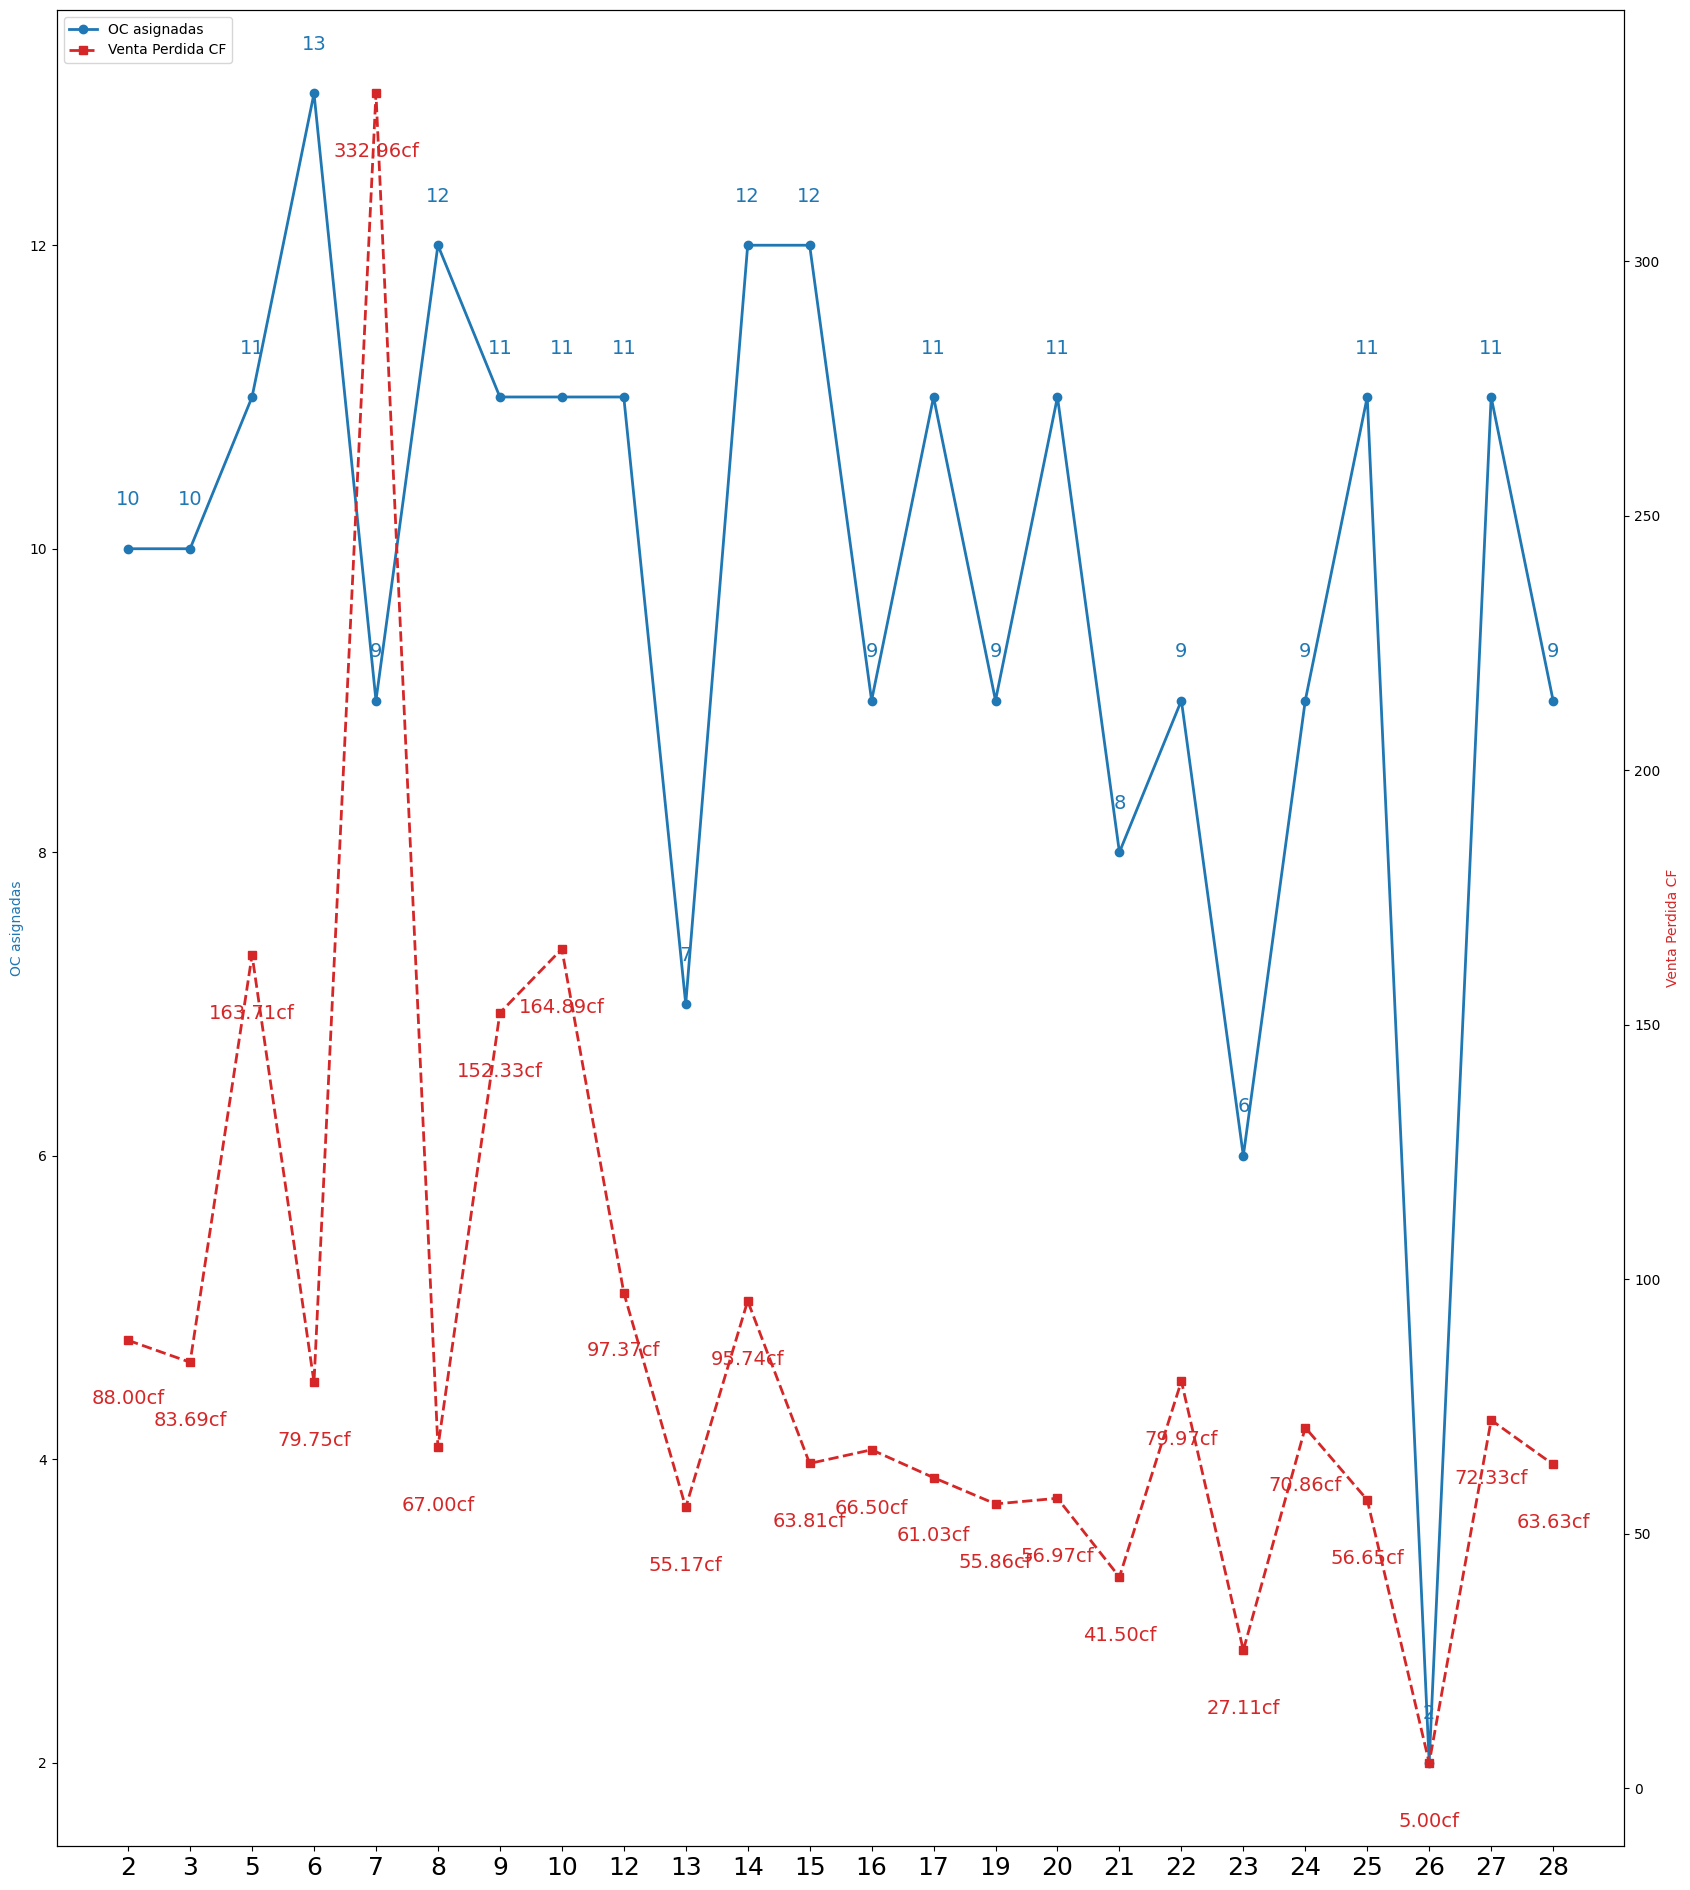

In [ ]:
# Venta perdida y nro de ordenes de carga por Mes y Dia

vr_time_label = 'OC asignadas'
vp_time_label = 'Venta Perdida CF'
def vr_vp_mes():
    try:
        # Suponiendo que 'ruta' tiene una columna 'Día' en formato datetime
        ruta['Mes'] = ruta['Día'].dt.to_period('M').dt.to_timestamp()

        # Tendencia por mes (adaptado desde día)
        # vr_por_mes_nro_orden = (
        #     ruta.groupby("Mes")
        #         .size()
        #         .sort_index()
        # )

        vr_por_mes_nro_orden = (
            ruta.groupby("Mes")["Número de orden de carga"]
                .nunique()
                .sort_index()
        )

        vp_por_mes = (
            ruta.groupby("Mes")["Venta Perdida CF"]
                .sum()
                .sort_index()
        )

        # Dibuja
        fig, ax1 = plt.subplots(figsize=(17, 19))

        # Eje primario: Nro Ordenes de Carga
        ax1.plot(vr_por_mes_nro_orden.index, vr_por_mes_nro_orden.values, marker="o", label=vr_time_label, linewidth=2, color="tab:blue")
        for x, y in zip(vr_por_mes_nro_orden.index, vr_por_mes_nro_orden.values):
            ax1.text(
                x, y + vr_por_mes_nro_orden.max() * 0.005, # 0.5 % por encima
                f"{y}",
                ha="center",
                va="bottom", 
                fontsize=15,
                color="tab:blue"
            )
        ax1.set_ylabel(vr_time_label, color="tab:blue")
        ax1.tick_params(axis="x", rotation=45, labelsize=18)        

        # Eje secundario: Venta Perdida
        ax2 = ax1.twinx()
        ax2.plot(vp_por_mes.index, vp_por_mes.values, marker="s", linestyle="--", label=vp_time_label, color="tab:red", linewidth=2)
        for x, y in zip(vp_por_mes.index, vp_por_mes.values):
            ax2.text(
                x, y - vp_por_mes.max() * 0.01, # 1 % por debajo
                f"{y:.2f}cf", 
                ha="center", 
                va="bottom", 
                fontsize=15,
                color="tab:red"
            )
        ax2.set_ylabel(vp_time_label, color="tab:red")

        # Formatear el eje X para mostrar el nombre del mes
        ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax1.xaxis.set_major_locator(mdates.MonthLocator())

        # Leyenda combinada
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

        plt.tight_layout()
        plt.savefig('vr_vp_tiempo.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

def vr_vp_dia():
    try:
        # Tendencia por fecha
        # vr_por_fecha_nro_orden = (
        #     ruta.groupby("Día")
        #     .size()          # equivalente a value_counts pero mantiene el orden cronológico
        #     .sort_index()    # ¡clave!: ordena el índice (las fechas)
        # )

        vr_por_fecha_nro_orden = (
            ruta.groupby("Día")["Número de orden de carga"]
            .nunique()
            .sort_index()
        )

        # Suma de Venta Perdida por día
        vp_por_fecha = (
            ruta.groupby("Día")["Venta Perdida CF"]
            .sum()
            .sort_index()
        )

        # Dibuja
        fig, ax1 = plt.subplots(figsize=(17, 19))

        # Extraer días del mes para eje X
        dias = vr_por_fecha_nro_orden.index
        x_pos = list(range(len(dias)))

        # Eje primario: Nro Ordenes de Carga
        ax1.plot(
            x_pos,
            vr_por_fecha_nro_orden.values,
            marker="o",
            label=vr_time_label,
            linewidth=2
        )
        # Etiquetas para cada punto de Nro Ordenes de Carga
        for x, y in zip(x_pos, vr_por_fecha_nro_orden.values):
            ax1.text(
                x, y + vr_por_fecha_nro_orden.max() * 0.02,  # 2 % por encima
                f"{y}",
                ha="center",
                va="bottom",
                fontsize=14,
                color="tab:blue"
            )

        # Eje secundario: Venta Perdida
        ax2 = ax1.twinx()
        ax2.plot(
            x_pos,
            vp_por_fecha.values,
            marker="s",
            linestyle="--",
            label=vp_time_label,
            color="tab:red",
            linewidth=2
        )
        # Etiquetas para Venta Perdida
        for x, y in zip(x_pos, vp_por_fecha.values):
            ax2.text(
                x, y - vp_por_fecha.max() * 0.04,  # 4 % por debajo
                f"{y:.2f}cf",
                ha="center",
                va="bottom",
                fontsize=14,
                color="tab:red"
            )

        # Formato de los ejes
        ax1.set_ylabel(vr_time_label, color="tab:blue")
        ax2.set_ylabel(vp_time_label, color="tab:red")
        
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels([str(fecha.day) for fecha in dias], rotation=0, fontsize=18)

        # Leyendas y formato
        # Combinar leyendas de ambos ejes
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

        plt.tight_layout()
        plt.savefig('vr_vp_tiempo.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

def vr_vp_dia_tr():
    try:
        # Tendencia por fecha
        # vr_por_fecha_nro_orden = (
        #     ruta.groupby("Día")
        #     .size()          # equivalente a value_counts pero mantiene el orden cronológico
        #     .sort_index()    # ¡clave!: ordena el índice (las fechas)
        # )

        vr_por_fecha_nro_orden = (
            ruta.groupby("Fecha")["Orden de Carga"]
            .nunique()
            .sort_index()
        )

        # Suma de Venta Perdida por día
        vp_por_fecha = (
            ruta.groupby("Fecha")["Rechazo CF"]
            .sum()
            .sort_index()
        )

        # Dibuja
        fig, ax1 = plt.subplots(figsize=(17, 19))

        # Extraer días del mes para eje X
        dias = vr_por_fecha_nro_orden.index
        x_pos = list(range(len(dias)))

        # Eje primario: Nro Ordenes de Carga
        ax1.plot(
            x_pos,
            vr_por_fecha_nro_orden.values,
            marker="o",
            label=vr_time_label,
            linewidth=2
        )
        # Etiquetas para cada punto de Nro Ordenes de Carga
        for x, y in zip(x_pos, vr_por_fecha_nro_orden.values):
            ax1.text(
                x, y + vr_por_fecha_nro_orden.max() * 0.02,  # 2 % por encima
                f"{y}",
                ha="center",
                va="bottom",
                fontsize=14,
                color="tab:blue"
            )

        # Eje secundario: Venta Perdida
        ax2 = ax1.twinx()
        ax2.plot(
            x_pos,
            vp_por_fecha.values,
            marker="s",
            linestyle="--",
            label=vp_time_label,
            color="tab:red",
            linewidth=2
        )
        # Etiquetas para Venta Perdida
        for x, y in zip(x_pos, vp_por_fecha.values):
            ax2.text(
                x, y - vp_por_fecha.max() * 0.04,  # 4 % por debajo
                f"{y:.2f}cf",
                ha="center",
                va="bottom",
                fontsize=14,
                color="tab:red"
            )

        # Formato de los ejes
        ax1.set_ylabel(vr_time_label, color="tab:blue")
        ax2.set_ylabel(vp_time_label, color="tab:red")
        
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels([str(fecha.day) for fecha in dias], rotation=0, fontsize=18)

        # Leyendas y formato
        # Combinar leyendas de ambos ejes
        lines_1, labels_1 = ax1.get_legend_handles_labels()
        lines_2, labels_2 = ax2.get_legend_handles_labels()
        ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

        plt.tight_layout()
        plt.savefig('vr_vp_tiempo.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

opcion_fecha_string = ""
if opcion_tiempo == 1:
    opcion_fecha_string = "mes"
    vr_vp_mes_titulo = f'Tiempo Histórico de OC y Venta Perdida (CF) por mes del año {fecha}'
    vr_vp_mes_descripcion = 'Este gráfico muestra la cantidad de ordenes de carga asignadas y ventas perdidas (CF) a travéz del tiempo (por mes).'
    vr_vp_mes()
if opcion_tiempo == 2:
    opcion_fecha_string = "dia"
    vr_vp_dia_titulo = f'Tiempo Histórico de OC y Venta Perdida (CF) por día del mes {fecha}'
    vr_vp_dia_descripcion = 'Este gráfico muestra la cantidad de ordenes de carga asignadas y ventas perdidas (CF) a travéz del tiempo (por día).'
    if opcion_fuente == 1:
        vr_vp_dia()
    else:
        vr_vp_dia_tr()

### MOTIVO DE ANULACION

In [ ]:
# CONFIGURACION PERSONALIZADA

categoria_title = 'Motivo de Anulación'
categoria_descripcion = 'motivo de anulación'

In [ ]:
# Venta perdida por motivo de anulación
#motivos_vp = ruta.groupby('Motivo de anulación')['Venta Perdida CF'].sum().sort_values(ascending=False)
#motivos_vp.plot(kind='bar', title='Cantidad de venta perdida por motivo')

vp_motivo_anulacion_titulo = f'Venta Perdida (CF) por {categoria_title}'
vp_motivo_anulacion_descripcion = f'Este gráfico muestra la cantidad de venta perdida por {categoria_descripcion} de forma descendente.'
def vp_motivo_anulacion():
    try:
        # Agrupar y ordenar
        motivos_vp = ruta.groupby('Motivo de anulación')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # Crear figura y eje
        fig, ax = plt.subplots()

        # Graficar
        bars = motivos_vp.plot(
            kind='bar',
            ax=ax,
            figsize=(bar_width, bar_height),
            color=color_1
        )

        total_vp_motivos = 0
        # Agregar valores exactos encima de cada barra
        for i, value in enumerate(motivos_vp.values):
            total_vp_motivos = total_vp_motivos + value
            ax.text(
                i, value + (value * 0.01),  # posición X, Y
                f'{value:,.1f}cf',          # formato con separador de miles, sin decimales
                ha='center', va='bottom',
                fontsize=9, color='black'
            )

        # Agregar nota dentro del gráfico (opcional)
        ax.text(
            0.98, 0.96,
            ('Fecha: ' + str(fecha) + '\n\nTotal: ' + str(round(total_vp_motivos, 2))), # texto a mostrar
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=10,
            color='gray',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
        )
        # Cambiar el titulo del eje x
        ax.set_xlabel("")

        # Rotar etiquetas del eje X
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.savefig('vp_motivo_anulacion.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

In [ ]:
# Venta perdida porcentual por motivo de anulación

vp_porcentual_motivo_anulacion_titulo = f'Venta Perdida (CF %) por {categoria_title} en Porcentaje'
vp_porcentual_motivo_anulacion_descripcion = f'Este gráfico muestra la venta perdida en porcentaje por {categoria_descripcion} de forma descendente.'
def vp_porcentual_motivo_anulacion():
    try:
        # Agrupar y ordenar por venta perdida
        vp_motivo_anulacion = ruta.groupby('Motivo de anulación')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a los 10 principales motivos de anulacion si el analisis es anual
        # vp_motivo_anulacion = vp_motivo_anulacion.head(10)

        # Crear gráfico circular
        fig, ax = plt.subplots(figsize=(circle_width_ma, circle_height_ma))
        
        # Crear pie chart sin etiquetas directamente en el gráfico
        wedges, texts, autotexts = ax.pie(
            vp_motivo_anulacion,
            labels=None,              # Sin etiquetas en el gráfico
            autopct='%1.1f%%',
            startangle=145,
            counterclock=False,
            textprops={'fontsize': circle_text_size} # Tamaño de texto
        )

        # Agregar leyenda con los nombres de los motivos de anulación
        ax.legend(
            wedges,
            vp_motivo_anulacion.index,
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05), # Posicion de la leyenda sobre el grafico
            fontsize=circle_legend_text_size,
            title_fontsize=circle_legend_title_size,
            ncol=circle_legend_nro_columns # Numero de columnas
        )

        # Título y estilo
        ax.set_title(f'{vp_porcentual_motivo_anulacion_titulo}')
        plt.tight_layout()
        plt.savefig('vp_porcentual_motivo_anulacion.png', bbox_inches='tight')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

### TRANSPORTISTA

In [ ]:
# CONFIGURACION PERSONALIZADA

categoria_title = 'Transportista'
categoria_descripcion = 'transportista'

In [ ]:
# Venta perdida por transportista
# ruta.groupby('Transportista')['Venta Perdida CF'].sum().sort_values(ascending=False).plot(kind='bar', title='Venta Perdida por Transportista')

vp_transportista_titulo = f'Venta Perdida (CF) por {categoria_title}'
vp_transportista_descripcion = f'Este gráfico muestra la cantidad de venta perdida por {categoria_descripcion} de forma descendente.'
def vp_transportista():
    try:
        # Agrupar y ordenar
        vp_transportista = ruta.groupby('Transportista')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # Crear figura y eje
        fig, ax = plt.subplots()

        # Graficar
        vp_transportista.plot(
            kind='bar',
            ax=ax,
            figsize=(bar_width, bar_height),
            color=color_1
        )

        total_vp_transportista = 0
        # Agregar valores exactos encima de cada barra
        for i, value in enumerate(vp_transportista.values):
            total_vp_transportista = total_vp_transportista + value
            ax.text(
                i, value + (value * 0.01),       # posición Y: ligeramente arriba de la barra
                f'{value:,.1f}cf',                # formato: separador de miles, sin decimales
                ha='center', va='bottom',
                fontsize=9, color='black'
            )

        # Agregar nota dentro del gráfico (opcional)
        ax.text(
            0.98, 0.96,
            ('Fecha: ' + str(fecha) + '\n\nTotal: ' + str(round(total_vp_transportista, 2))), # texto a mostrar
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=10,
            color='gray',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
        )
        # Cambiar el titulo del eje x
        ax.set_xlabel("")

        # Rotar etiquetas del eje X
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.savefig('vp_transportista.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

In [ ]:
# Venta perdida porcentual por transportista

vp_porcentual_transportista_titulo = f'Venta Perdida (CF %) por {categoria_title} en Porcentaje'
vp_porcentual_transportista_descripcion = f'Este gráfico muestra la venta perdida en porcentaje por {categoria_descripcion} de forma descendente.'
def vp_porcentual_transportista():
    try:
        # Agrupar y ordenar por venta perdida
        vp_transportista = ruta.groupby('Transportista')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a los 10 principales transportistas si el analisis es anual
        # vp_transportista = vp_transportista.head(12)

        # Crear gráfico circular
        fig, ax = plt.subplots(figsize=(circle_width_tr, circle_width_tr))
        
        # Crear pie chart sin etiquetas directamente en el gráfico
        wedges, texts, autotexts = ax.pie(
            vp_transportista,
            labels=None,              # Sin etiquetas en el gráfico
            autopct='%1.1f%%',
            startangle=145,
            counterclock=False,
            textprops={'fontsize': circle_text_size} # Tamaño de texto
        )

        # Agregar leyenda con los nombres de los transportistas
        ax.legend(
            wedges,
            vp_transportista.index,
            title=f'{categoria_title}',
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05), # Posicion de la leyenda sobre el grafico
            fontsize=circle_legend_text_size,
            title_fontsize=circle_legend_title_size,
            ncol=circle_legend_nro_columns # Numero de columnas
        )

        # Título y estilo
        ax.set_title(f'{vp_porcentual_transportista_titulo}')
        plt.tight_layout()
        plt.savefig('vp_porcentual_transportista.png', bbox_inches='tight')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

### RUTA TRONCAL

In [ ]:
# CONFIGURACION PERSONALIZADA

categoria_title = 'Ruta'
categoria_descripcion = 'ruta'

In [ ]:
# Venta perdida por ruta
# ruta.groupby('Ruta Troncal Dinámico')['Venta Perdida CF'].sum().sort_values(ascending=False).plot(kind='bar', title='Venta Perdida por Ruta')

vp_ruta_titulo = f'Venta Perdida (CF) por {categoria_title}'
vp_ruta_descripcion = f'Este gráfico muestra la cantidad de venta perdida por {categoria_descripcion} de forma descendente.'
def vp_ruta():
    try:
        # Agrupar y ordenar por venta perdida
        vp_ruta = ruta.groupby('Ruta Troncal Dinámico')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # Crear figura y eje
        fig, ax = plt.subplots()

        # Graficar
        vp_ruta.plot(
            kind='bar',
            ax=ax,
            figsize=(bar_width, bar_height),
            color=color_1
        )

        total_vp_ruta = 0
        # Agregar etiquetas con valores exactos
        for i, value in enumerate(vp_ruta.values):
            total_vp_ruta = total_vp_ruta + value
            ax.text(
                i, value + (value * 0.01), # Y: un poco arriba de la barra
                f'{value:,.1f}cf',          # formato con separadores de miles
                ha='center', va='bottom',
                fontsize=9, color='black'
            )

        # Agregar nota dentro del gráfico
        ax.text(
            0.98, 0.96,
            ('Fecha: ' + str(fecha) + '\n\nTotal: ' + str(round(total_vp_ruta, 2))), # texto a mostrar
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=10,
            color='gray',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
        )
        # Cambiar el titulo del eje x
        ax.set_xlabel("")

        # Rotar etiquetas del eje X
        plt.xticks(rotation=0, ha='right')

        plt.tight_layout()
        plt.savefig('vp_ruta.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

In [ ]:
# Venta perdida porcentual por ruta

vp_porcentual_ruta_titulo = f'Venta Perdida (CF %) por {categoria_title} en Porcentaje'
vp_porcentual_ruta_descripcion = f'Este gráfico muestra la venta perdida en porcentaje por {categoria_descripcion} de forma descendente.'
def vp_porcentual_ruta():
    try:
        # Agrupar y ordenar por venta perdida
        vp_ruta = ruta.groupby('Ruta Troncal Dinámico')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a las principales rutas si el analisis es anual
        # vp_ruta = vp_ruta.head(10)

        # Crear gráfico circular
        fig, ax = plt.subplots(figsize=(circle_width_ma, circle_height_ma))
        
        # Crear pie chart sin etiquetas directamente en el gráfico
        wedges, texts, autotexts = ax.pie(
            vp_ruta,
            labels=None,              # Sin etiquetas en el gráfico
            autopct='%1.1f%%',
            startangle=145,
            counterclock=False,
            textprops={'fontsize': circle_text_size} # Tamaño de texto
        )

        # Agregar leyenda con los nombres de las rutas
        ax.legend(
            wedges,
            vp_ruta.index,
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05), # Posicion de la leyenda sobre el grafico
            fontsize=circle_legend_text_size,
            title_fontsize=circle_legend_title_size,
            ncol=circle_legend_nro_columns # Numero de columnas
        )

        # Título y estilo
        ax.set_title(f'{vp_porcentual_ruta_titulo}')
        plt.tight_layout()
        plt.savefig('vp_porcentual_ruta.png', bbox_inches='tight')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

### CLIENTE

In [ ]:
# CONFIGURACION PERSONALIZADA

categoria_title = 'Cliente'
categoria_descripcion = 'cliente'

In [ ]:
# Venta perdida por cliente
# clientes_vp = ruta.groupby('Cliente')['Venta Perdida CF'].sum().sort_values(ascending=False)
# clientes_vp.plot(kind='bar', title='Venta Perdida por Cliente')

vp_cliente_titulo = f'Venta Perdida (CF) por {categoria_title}'
vp_cliente_descripcion = f'Este gráfico muestra la cantidad de venta perdida por {categoria_descripcion} de forma descendente.'
def vp_cliente():
    try:
        # Agrupar y ordenar por venta perdida
        clientes_vp = ruta.groupby('Cliente')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a los principales clientes si el analisis es anual
        clientes_vp = clientes_vp.head(12) if opcion_tiempo == 1 else clientes_vp.head(20)

        # Crear figura y eje
        fig, ax = plt.subplots()

        # Graficar
        clientes_vp.plot(
            kind='bar',
            ax=ax,
            figsize=(bar_width, bar_height),
            color=color_1
        )

        total_vp_cliente = 0
        # Agregar valores exactos sobre cada barra
        for i, value in enumerate(clientes_vp.values):
            total_vp_cliente = total_vp_cliente + value
            ax.text(
                i, value + (value * 0.01),
                f'{value:,.1f}cf',  # Formato con separador de miles, sin decimales
                ha='center', va='bottom',
                fontsize=9, color='black'
            )

        # Agregar nota interna en el gráfico
        ax.text(
            0.98, 0.96,
            ('Fecha: ' + str(fecha) + '\n\nTotal: ' + str(round(total_vp_cliente, 2))), # texto a mostrar
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=10,
            color='gray',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
        )
        # Cambiar el titulo del eje x
        ax.set_xlabel("")

        # Mejorar presentación si los nombres de clientes son largos
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.savefig('vp_cliente.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

In [ ]:
# Venta perdida porcentual por cliente

vp_porcentual_cliente_titulo = f'Venta Perdida (CF %) por {categoria_title} en Porcentaje'
vp_porcentual_cliente_descripcion = f'Este gráfico muestra la venta perdida en porcentaje por {categoria_descripcion} de forma descendente.'
def vp_porcentual_cliente():
    try:
        # Agrupar y ordenar por venta perdida
        vp_cliente = ruta.groupby('Cliente')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a los principales clientes si el analisis es anual
        vp_cliente = vp_cliente.head(12) if opcion_tiempo == 1 else vp_cliente.head(20)

        # Crear gráfico circular
        fig, ax = plt.subplots(figsize=(circle_width_tr, circle_height_tr))
        
        # Crear pie chart sin etiquetas directamente en el gráfico
        wedges, texts, autotexts = ax.pie(
            vp_cliente,
            labels=None,              # Sin etiquetas en el gráfico
            autopct='%1.1f%%',
            startangle=145,
            counterclock=False,
            textprops={'fontsize': circle_text_size} # Tamaño de texto
        )

        # Agregar leyenda con los nombres de los clientes
        ax.legend(
            wedges,
            vp_cliente.index,
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05), # Posicion de la leyenda sobre el grafico
            fontsize=circle_legend_text_size,
            title_fontsize=circle_legend_title_size,
            ncol=circle_legend_nro_columns # Numero de columnas
        )

        # Título y estilo
        ax.set_title(f'{vp_porcentual_cliente_titulo}')
        plt.tight_layout()
        plt.savefig('vp_porcentual_cliente.png', bbox_inches='tight')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

### VENDEDOR

In [ ]:
# CONFIGURACION PERSONALIZADA

categoria_title = 'Vendedor'
categoria_descripcion = 'vendedor'

In [ ]:
# Venta perdida por vendedor

vp_vendedor_titulo = f'Venta Perdida (CF) por {categoria_title}'
vp_vendedor_descripcion = f'Este gráfico muestra la cantidad de venta perdida por {categoria_descripcion} de forma descendente.'
def vp_vendedor():
    try:
        # Agrupar y ordenar por venta perdida
        vendedor_vp = ruta.groupby('Nombre Vendedor')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a los principales clientes si el analisis es anual
        vendedor_vp = vendedor_vp.head(12) if opcion_tiempo == 1 else vendedor_vp.head(20)

        # Crear figura y eje
        fig, ax = plt.subplots()

        # Graficar
        vendedor_vp.plot(
            kind='bar',
            ax=ax,
            figsize=(bar_width, bar_height),
            color=color_1
        )

        total_vp_vendedor = 0
        # Agregar valores exactos sobre cada barra
        for i, value in enumerate(vendedor_vp.values):
            total_vp_vendedor = total_vp_vendedor + value
            ax.text(
                i, value + (value * 0.01),
                f'{value:,.1f}cf',  # Formato con separador de miles, sin decimales
                ha='center', va='bottom',
                fontsize=9, color='black'
            )

        # Agregar nota interna en el gráfico
        ax.text(
            0.98, 0.96,
            ('Fecha: ' + str(fecha) + '\n\nTotal: ' + str(round(total_vp_vendedor, 2))), # texto a mostrar
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=10,
            color='gray',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
        )
        # Cambiar el titulo del eje x
        ax.set_xlabel("")

        # Mejorar presentación si los nombres de clientes son largos
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.savefig('vp_vendedor.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

In [ ]:
# Venta perdida porcentual por vendedor

vp_porcentual_vendedor_titulo = f'Venta Perdida (CF %) por {categoria_title} en Porcentaje'
vp_porcentual_vendedor_descripcion = f'Este gráfico muestra la venta perdida en porcentaje por {categoria_descripcion} de forma descendente.'
def vp_porcentual_vendedor():
    try:
        # Agrupar y ordenar por venta perdida
        vp_vendedor = ruta.groupby('Nombre Vendedor')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a los principales vendedores si el analisis es anual
        vp_vendedor = vp_vendedor.head(12) if opcion_tiempo == 1 else vp_vendedor.head(20)

        # Crear gráfico circular
        fig, ax = plt.subplots(figsize=(circle_width_tr, circle_height_tr))
        
        # Crear pie chart sin etiquetas directamente en el gráfico
        wedges, texts, autotexts = ax.pie(
            vp_vendedor,
            labels=None,              # Sin etiquetas en el gráfico
            autopct='%1.1f%%',
            startangle=145,
            counterclock=False,
            textprops={'fontsize': circle_text_size} # Tamaño de texto
        )

        # Agregar leyenda con los nombres de los vendedores
        ax.legend(
            wedges,
            vp_vendedor.index,
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05), # Posicion de la leyenda sobre el grafico
            fontsize=circle_legend_text_size,
            title_fontsize=circle_legend_title_size,
            ncol=circle_legend_nro_columns # Numero de columnas
        )

        # Título y estilo
        ax.set_title(f'{vp_porcentual_vendedor_titulo}')
        plt.tight_layout()
        plt.savefig('vp_porcentual_vendedor.png', bbox_inches='tight')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

### LOCACION

In [ ]:
# CONFIGURACION PERSONALIZADA

categoria_title = 'Locacion'
categoria_descripcion = 'locacion'

In [ ]:
# Venta perdida por Locacion

vp_locacion_titulo = f'Venta Perdida (CF) por {categoria_title}'
vp_locacion_descripcion = f'Este gráfico muestra la cantidad de venta perdida por {categoria_descripcion} de forma descendente.'
def vp_locacion():
    try:
        # Agrupar y ordenar por venta perdida
        locacion_vp = ruta.groupby('Locación')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # Crear figura y eje
        fig, ax = plt.subplots()

        # Graficar
        locacion_vp.plot(
            kind='bar',
            ax=ax,
            figsize=(bar_width, bar_height),
            color=color_1
        )

        total_vp_locacion = 0
        # Agregar valores exactos sobre cada barra
        for i, value in enumerate(locacion_vp.values):
            total_vp_locacion = total_vp_locacion + value
            ax.text(
                i, value + (value * 0.01),
                f'{value:,.1f}cf',  # Formato con separador de miles, sin decimales
                ha='center', va='bottom',
                fontsize=9, color='black'
            )

        # Agregar nota interna en el gráfico
        ax.text(
            0.98, 0.96,
            ('Fecha: ' + str(fecha) + '\n\nTotal: ' + str(round(total_vp_locacion, 2))), # texto a mostrar
            transform=ax.transAxes,
            ha='right', va='top',
            fontsize=10,
            color='gray',
            bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3')
        )
        # Cambiar el titulo del eje x
        ax.set_xlabel("")

        # Mejorar presentación si los nombres de clientes son largos
        plt.xticks(rotation=45, ha='right')

        plt.tight_layout()
        plt.savefig('vp_locacion.png')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

In [ ]:
# Venta perdida porcentual por locacion

vp_porcentual_locacion_titulo = f'Venta Perdida (CF %) por {categoria_title} en Porcentaje'
vp_porcentual_locacion_descripcion = f'Este gráfico muestra la venta perdida en porcentaje por {categoria_descripcion} de forma descendente.'
def vp_porcentual_locacion():
    try:
        # Agrupar y ordenar por venta perdida
        vp_locacion = ruta.groupby('Locación')['Venta Perdida CF'].sum().sort_values(ascending=False)

        # (Opcional) Limitar a las 10 principales locaciones si el analisis es anual
        # vp_locacion = vp_locacion.head(10)

        # Crear gráfico circular
        fig, ax = plt.subplots(figsize=(circle_width_tr, circle_height_tr))
        
        # Crear pie chart sin etiquetas directamente en el gráfico
        wedges, texts, autotexts = ax.pie(
            vp_locacion,
            labels=None,              # Sin etiquetas en el gráfico
            autopct='%1.1f%%',
            startangle=145,
            counterclock=False,
            textprops={'fontsize': circle_text_size} # Tamaño de texto
        )

        # Agregar leyenda con los nombres de las locaciones
        ax.legend(
            wedges,
            vp_locacion.index,
            loc='upper center',
            bbox_to_anchor=(0.5, 0.05), # Posicion de la leyenda sobre el grafico
            fontsize=circle_legend_text_size,
            title_fontsize=circle_legend_title_size,
            ncol=circle_legend_nro_columns # Numero de columnas
        )

        # Título y estilo
        ax.set_title(f'{vp_porcentual_locacion_titulo}')
        plt.tight_layout()
        plt.savefig('vp_porcentual_locacion.png', bbox_inches='tight')
        #plt.show()
    except:
        print(f'Cantidad de datos: {len(ruta)}')
        print('No hay datos (Probablemente un domingo o festivo o no hubo rechazos)')

### Consignar tipo de analisis (metrica o categoria)

CONFIGURACION --------------------------------------------------------------------------
Tiempo: Por Mes -> 5/2025
Locaciones: ['06 AYA EL PEDREGAL', '38 AYA ATICO', '40 AYA CHALA', '88 AYA CAMANA']
Tipo de analisis: Categoría
Analisis: Por Transportista


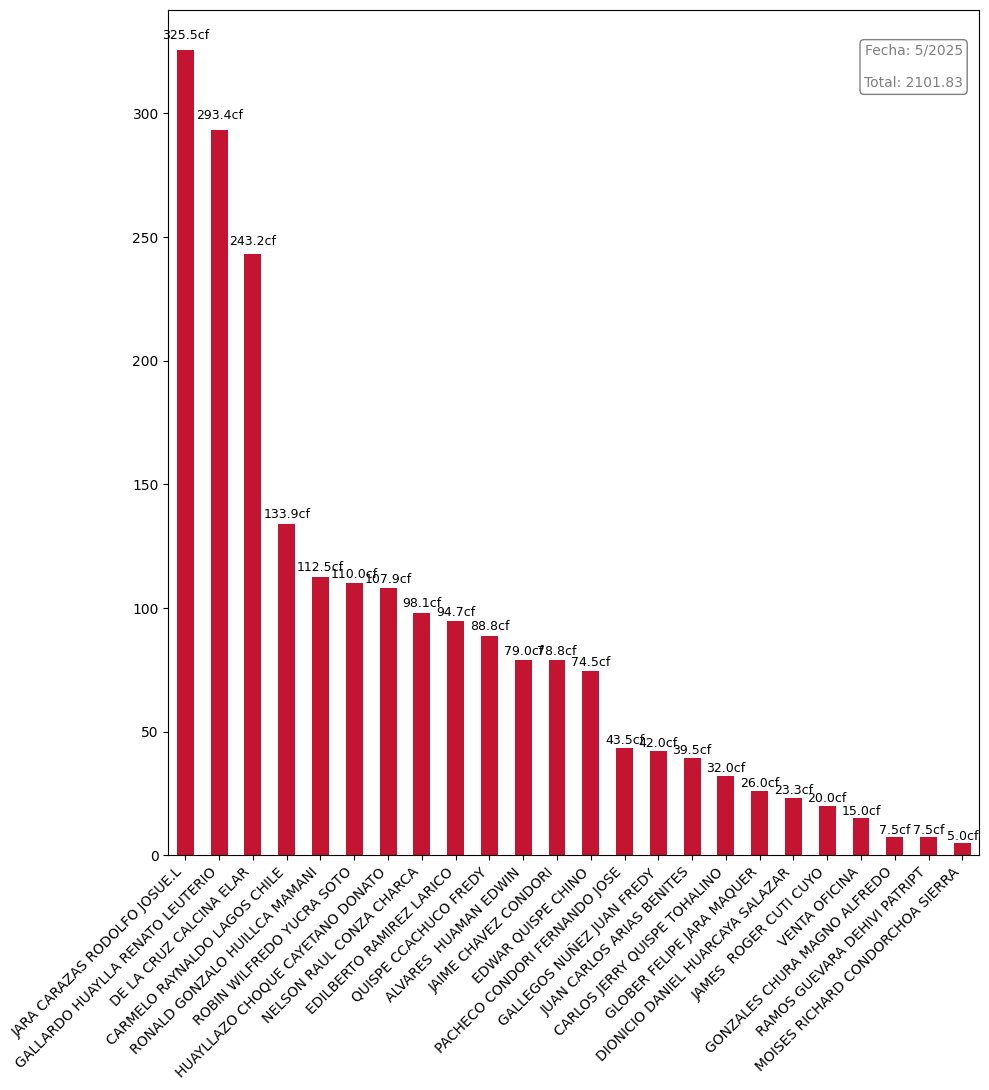

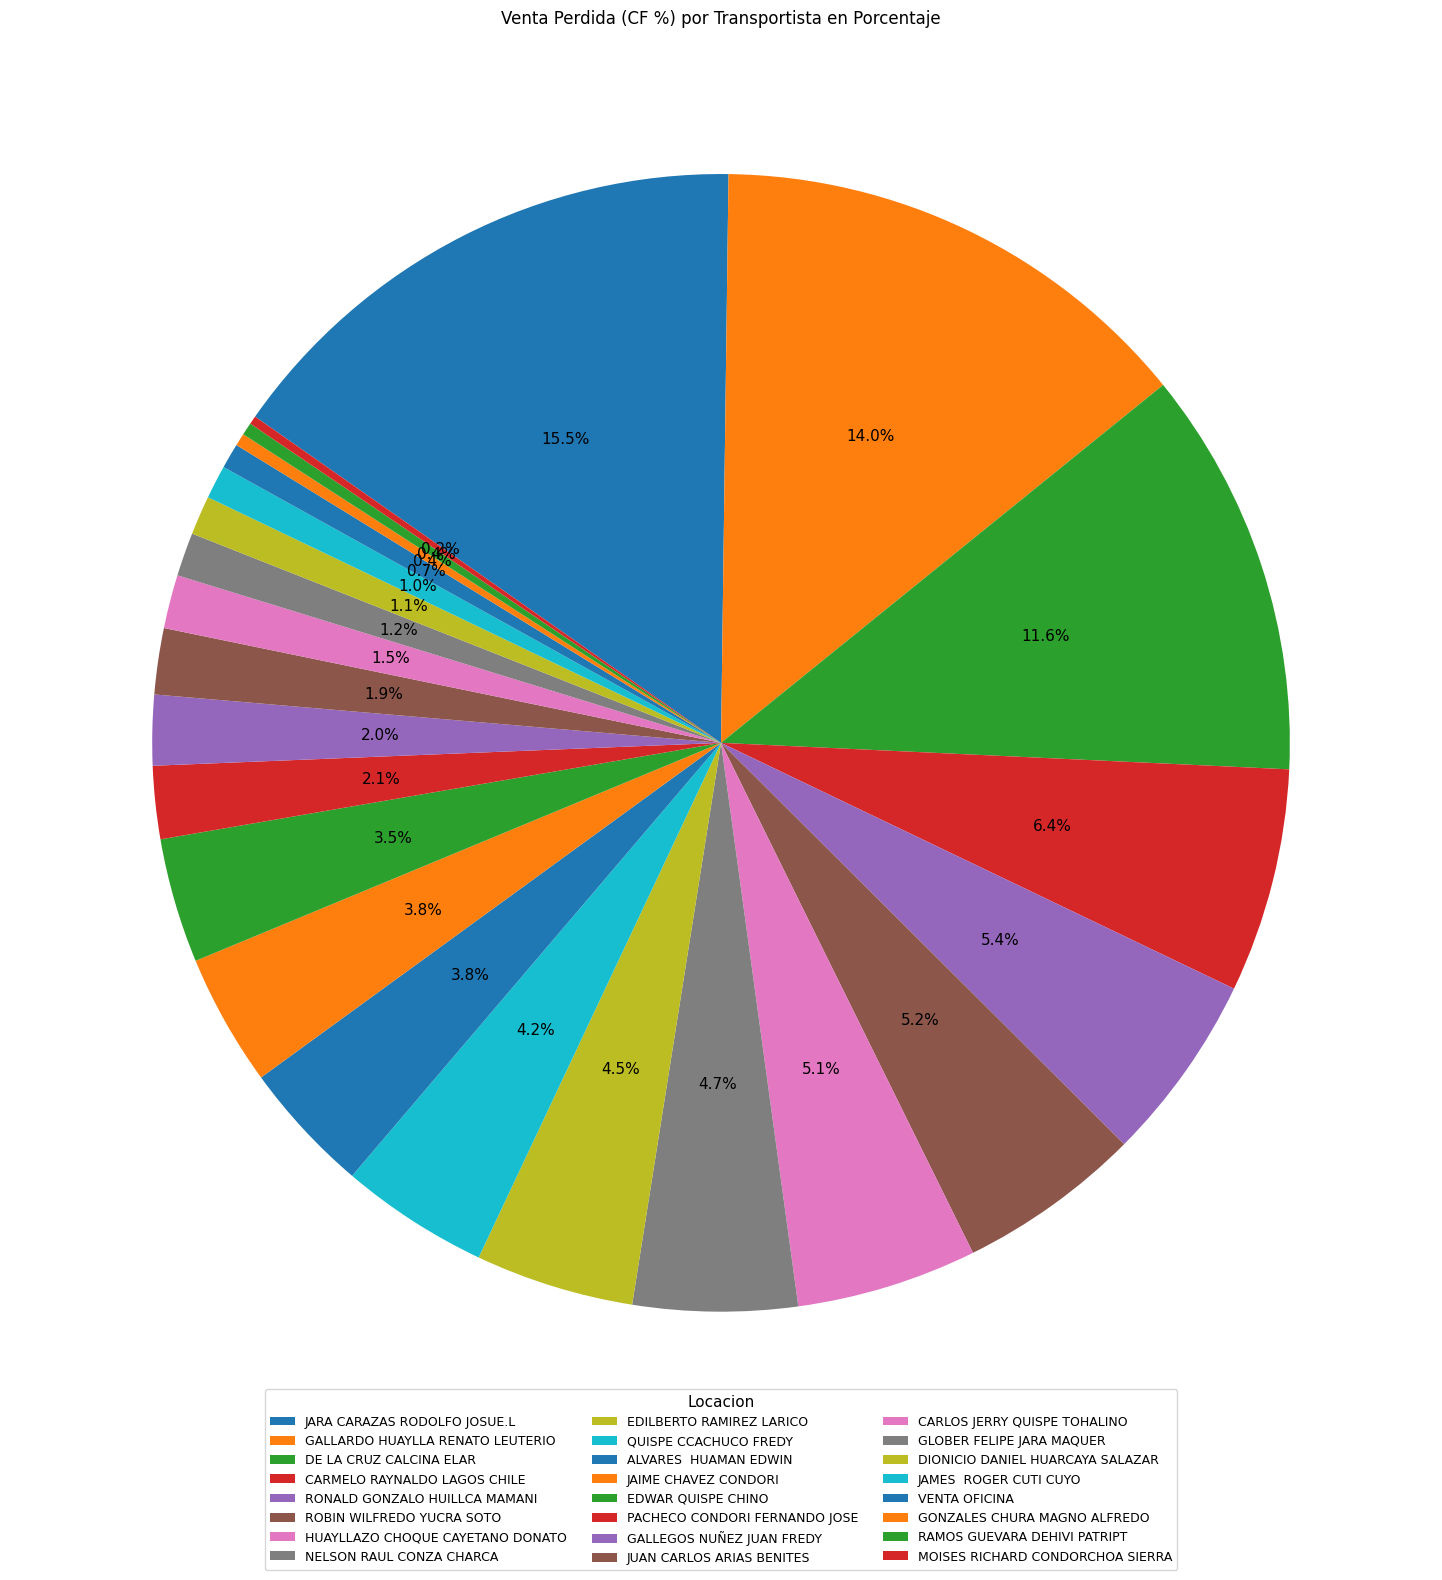

In [ ]:
''' ESCOGER QUE TIPO DE ANALISIS HACER
(1) Por Venta Perdida CF
(2) Por Veces Rechazadas
(3) Por Venta Perdida CF y Veces Rechazadas
(4) Por Venta Perdida (Porcentual)
(5) Por Veces Rechazadas (Porcentual)
(6) Por Categoria
'''

opcion_tiempo_dic = {
    1: 'Por Año',
    2: 'Por Mes',
    3: 'Por Día',
    4: 'Intervalo',
    5: 'Mayor igual que',
}

opcion_metrica_dic = {
    1: ['vp_', 'Por Venta Perdida CF'],
    2: ['vp_porcentual_', 'Por Venta Perdida (Porcentual)'],
}

opcion_categoria_dic = {
    1: ['motivo_anulacion', 'Por Motivo de Anulacion'],
    2: ['transportista', 'Por Transportista'],
    3: ['ruta', 'Por Ruta'],
    4: ['cliente', 'Por Cliente'],
    5: ['vendedor', 'Por Vendedor'],
    6: ['locacion', 'Por Locacion'],
}

# Seleccionar la opcion_tipo de análisis por tipo de analisis
opcion_tipo = int(input("(1=Metrica) (2=Categoria)"))

if opcion_tipo == 1: # Por metrica
    opcion_metrica = int(input("(1=VP) (2=VP%)"))
    eval(f'{opcion_metrica_dic[opcion_metrica][0]}motivo_anulacion()')
    eval(f'{opcion_metrica_dic[opcion_metrica][0]}transportista()')
    eval(f'{opcion_metrica_dic[opcion_metrica][0]}ruta()')
    eval(f'{opcion_metrica_dic[opcion_metrica][0]}cliente()')
    eval(f'{opcion_metrica_dic[opcion_metrica][0]}vendedor()')
    eval(f'{opcion_metrica_dic[opcion_metrica][0]}locacion()')

elif opcion_tipo == 2: # Por categoria
    opcion_categoria = int(input("(1=Motivo) (2=Transportista) (3=Ruta) (4=Cliente) (5=Vendedor) (6=Locacion)"))
    eval(f'vp_{opcion_categoria_dic[opcion_categoria][0]}()')
    eval(f'vp_porcentual_{opcion_categoria_dic[opcion_categoria][0]}()')

print('CONFIGURACION --------------------------------------------------------------------------')

print(f'Tiempo: {opcion_tiempo_dic[opcion_tiempo]} -> {fecha}')
print(f'Locaciones: {locaciones}')
print(f'Tipo de analisis: {'Métrica' if opcion_tipo == 1 else 'Categoría'}')
print(f'Analisis: {opcion_metrica_dic[opcion_metrica][1] if opcion_tipo == 1 else opcion_categoria_dic[opcion_categoria][1]}')

# REPORTE

### SETUP

In [ ]:
from docx import Document
from docx.shared import Inches, Pt, RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.oxml import OxmlElement
from itertools import zip_longest

# Crear documento
doc = Document()

### CONFIGURACION

In [ ]:
# Definir variables o constantes de reporte

nombre_autor = 'Gerardo Portocarrero Banda'
correo_autor = 'ainformacion@ayacda.com'
page_width = 5.85

# Constantes
metrica = 'Métrica'
categoria = 'Categoría'
reporte = 'Reporte'

# Fuente de letra
letra_robotica = 'Courier New'
letra_formal = 'Segoe UI'

# Tamaño de letra
titulo_principal_size = 26
titulo_secundario_size = 16
subtitulo_size = 12
texto_normal_size = 9
notas_size = 7

# Colores
azul_profesional = "#365F91" # para titulos o subtitulos
azul_profesional_rgb = RGBColor(54, 95, 145) 
azul_corporativo = "#0066cc" # para subtitulos
azul_corporativo_rgb = RGBColor(0, 102, 204)
negro_total = "#000000" # para texto
negro_total_rgb = RGBColor(0, 0, 0)

### ENCABEZADO

In [ ]:
# Encabezado de la primera sección
section = doc.sections[0]
header = section.header
header_paragraph = header.paragraphs[0]
header_paragraph.clear()

# Crear tabla en el encabezado: Nombre (izquierda) - Fecha (derecha) ===
table = header.add_table(rows=2, cols=2, width=Inches(page_width))
table.autofit = False
table.columns[0].width = Inches(4.3)
table.columns[1].width = Inches(1.5)

# Fila 1: Nombre y Fecha
cell_name = table.cell(0, 0)
cell_date = table.cell(0, 1)

p_name = cell_name.paragraphs[0]
p_name.paragraph_format.space_after = Pt(0)
run_name = p_name.add_run("Gerardo Portocarrero Banda")
run_name.font.name = letra_robotica
run_name.font.size = Pt(texto_normal_size)

p_date = cell_date.paragraphs[0]
p_date.paragraph_format.space_after = Pt(0)
p_date.alignment = WD_ALIGN_PARAGRAPH.RIGHT
hoy_hora_min_sec = datetime.now().replace(microsecond=0)
run_date = p_date.add_run(str(hoy_hora_min_sec))
run_date.font.name = letra_robotica
run_date.font.size = Pt(texto_normal_size)

# Fila 2: Subtítulo debajo de nombre (deja vacío la celda derecha)
cell_subtitle = table.cell(1, 0)
cell_subtitle_right = table.cell(1, 1)

p_sub = cell_subtitle.paragraphs[0]
p_sub.paragraph_format.space_before = Pt(0)
p_sub.paragraph_format.space_after = Pt(0)

run_sub = p_sub.add_run("Analista de datos AYA")
run_sub.font.name = letra_robotica
run_sub.font.size = Pt(notas_size)

### PIE DE PAGINA

In [ ]:
# Pie de pagina (dar feedback sobre el informe)

lista_metricas = [x[1] for x in opcion_metrica_dic.values()]
lista_categorias = [x[1] for x in opcion_categoria_dic.values()]
lista_terminos = [
    'CF: Cajas físicas',
    'Estructura Fecha: dia/mes/año',
    'OC: Orden de carga'
]
nro_filas = max([len(lista_categorias), len(lista_categorias), len(lista_terminos)])
nro_columnas = 3

# Acceder a la primera sección del documento
section = doc.sections[0]
footer = section.footer

# Agregar tabla al pie de página: filas (+1 por los titulos), columnas
table = footer.add_table(rows=nro_filas+1, cols=nro_columnas, width=Inches(page_width))
table.autofit = True
table.allow_autofit = True

# Encabezados
headers = [
    f'{reporte} de {metrica}',
    f'{reporte} de {categoria}',
    'Términos/Abreviaturas'
]

for col in range(nro_columnas):
    cell = table.cell(0, col)
    cell.text = ""
    paragraph = cell.paragraphs[0]
    paragraph.paragraph_format.space_before = Pt(0)
    paragraph.paragraph_format.space_after = Pt(0)
    run = paragraph.add_run(headers[col])
    run.font.name = letra_formal
    run.font.size = Pt(notas_size)
    run.bold = True


# Unir datos
np_notas_pie_pagina = list(zip_longest(lista_metricas, lista_categorias, lista_terminos, fillvalue='-'))  # Usa 0 en lugar de None
notas_pie_pagina = np.array(np_notas_pie_pagina)

# Insertar en la tabla
for i, row_data in enumerate(notas_pie_pagina, start=1):
    for j in range(nro_columnas):
        cell = table.cell(i, j)
        cell.text = "" # Limpiar cualquier contenido previo

        paragraph = cell.paragraphs[0]
        paragraph.paragraph_format.space_before = Pt(0)
        paragraph.paragraph_format.space_after = Pt(0)

        run = paragraph.add_run(str(row_data[j]))
        run.font.name = letra_formal
        run.font.size = Pt(notas_size)

### HOJA PRESENTACION

In [ ]:
# Datos generales del reporte
for _ in range(2):
    doc.add_paragraph("")

# titulo_principal
titulo1 = doc.add_paragraph()
titulo1.paragraph_format.space_after = Pt(0)
titulo1.alignment = WD_ALIGN_PARAGRAPH.CENTER
run_titulo = titulo1.add_run(f'{reporte} de Rechazos')
run_titulo.font.size = Pt(titulo_principal_size)
run_titulo.font.color.rgb = azul_profesional_rgb
run_titulo.bold = True
run_titulo.font.name = letra_formal

# titulo_secundario
subregular1 = doc.add_paragraph()
subregular1.paragraph_format.space_after = Pt(0)
subregular1.alignment = WD_ALIGN_PARAGRAPH.CENTER
run_subregular1 = subregular1.add_run(f'{metrica if opcion_tipo == 1 else categoria}')
run_subregular1.font.size = Pt(titulo_secundario_size)
run_subregular1.font.name = letra_formal

# subtitulo
subpeque = doc.add_paragraph()
subpeque.paragraph_format.space_before = Pt(0)
subpeque.alignment = WD_ALIGN_PARAGRAPH.CENTER
run_subpeque = subpeque.add_run(f'{opcion_metrica_dic[opcion_metrica][1] if opcion_tipo == 1 else opcion_categoria_dic[opcion_categoria][1]}')
run_subpeque.font.size = Pt(subtitulo_size)
run_subpeque.font.name = letra_formal

# === Espacio en blanco ===
for _ in range(2):
    doc.add_paragraph("")

# titulo_secundario
subregular2 = doc.add_paragraph()
subregular2.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_subregular2 = subregular2.add_run("Resumen")
run_subregular2.font.size = Pt(titulo_secundario_size)
run_subregular2.font.name = letra_formal
run_subregular2.font.color.rgb = azul_corporativo_rgb
# texto_normal
descripcion_general = "Reporte específico para el seguimiento de rechazos de pedidos, " \
"también conocidos como ventas perdidas, con el fin de identificar oportunidades de mejora " \
"en la cadena de distribución y maximizar la eficiencia comercial. Este reporte cuantifica " \
"los rechazos en cajas físicas (CF), una unidad estándar utilizada para facilitar el análisis " \
"operativo y logístico."
texto0 = doc.add_paragraph()
texto0.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_texto0 = texto0.add_run(f'{descripcion_general}')
run_texto0.font.size = Pt(texto_normal_size)
run_texto0.font.name = letra_formal

# === Espacio en blanco ===
doc.add_paragraph("")

# titulo_secundario
subregular3 = doc.add_paragraph()
subregular3.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_subregular3 = subregular3.add_run("Características")
run_subregular3.font.size = Pt(titulo_secundario_size)
run_subregular3.font.name = letra_formal
run_subregular3.font.color.rgb = azul_corporativo_rgb
# texto_normal
texto1 = doc.add_paragraph()
texto1.paragraph_format.space_after = Pt(0)
texto1.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_texto1 = texto1.add_run(f'Tiempo considerado: {opcion_tiempo_dic[opcion_tiempo]} [{fecha}]')
run_texto1.font.size = Pt(texto_normal_size)
run_texto1.font.name = letra_formal
# texto_normal
texto2 = doc.add_paragraph()
texto2.paragraph_format.space_before = Pt(0)
texto2.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_texto2 = texto2.add_run(f'Locaciones consideradas: {', '.join([parse_locaciones[locacion] for locacion in locaciones])}')
run_texto2.font.size = Pt(texto_normal_size)
run_texto2.font.name = letra_formal

# === Espacio en blanco ===
doc.add_paragraph("")

# titulo_secundario
sub3 = doc.add_paragraph()
sub3.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_sub3 = sub3.add_run("Fuente")
run_sub3.font.size = Pt(titulo_secundario_size)
run_sub3.font.name = letra_formal
run_sub3.font.color.rgb = azul_corporativo_rgb
# texto_normal
texto3 = doc.add_paragraph()
texto3.paragraph_format.space_after = Pt(0)
texto3.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_texto3 = texto3.add_run("ARCHIVO: Venta Perdida x Cliente y ruta diaria.xlsx")
run_texto3.font.size = Pt(texto_normal_size)
run_texto3.font.name = letra_formal
# texto_normal
texto4 = doc.add_paragraph()
texto4.paragraph_format.space_before = Pt(0)
texto4.alignment = WD_ALIGN_PARAGRAPH.LEFT
run_texto4 = texto4.add_run("CORREO: rbernal@aclogistica.pe")
run_texto4.font.size = Pt(texto_normal_size)
run_texto4.font.name = letra_formal

# === Salto de pagina ===
doc.add_page_break()

### CUERPO (graficas)

In [ ]:
# Configuracion default para graficos
# titulo
# descripcion
# grafica

def draw_graphics(titulo, descripcion, grafico):
    # Título
    titulo_parrafo = doc.add_paragraph()
    titulo_parrafo.paragraph_format.space_after = Pt(0)
    titulo_run = titulo_parrafo.add_run(titulo)
    titulo_run.font.name = letra_formal
    titulo_run.font.size = Pt(subtitulo_size)
    titulo_run.font.color.rgb = azul_corporativo_rgb
    titulo_run.bold = True

    # Descripción
    descripcion_parrafo = doc.add_paragraph()
    descripcion_parrafo.paragraph_format.space_before = Pt(0)
    descripcion_run = descripcion_parrafo.add_run(descripcion)
    descripcion_run.font.name = letra_formal
    descripcion_run.font.size = Pt(texto_normal_size)
    descripcion_run.font.color.rgb = negro_total_rgb

    # Grafica
    p_img = doc.add_paragraph()
    p_img.alignment = WD_ALIGN_PARAGRAPH.CENTER
    run_img = p_img.add_run()
    run_img.add_picture(grafico, width=Inches(page_width))

In [ ]:
# Adicion de graficas al reporte (Metrica o Categoria)

# Por tiempo
doc.add_paragraph("")
draw_graphics(eval(f'vr_vp_{opcion_fecha_string}_titulo'), eval(f'vr_vp_{opcion_fecha_string}_descripcion'), 'vr_vp_tiempo.png')
doc.add_page_break()

# Por metrica
if opcion_tipo == 1:
    for key, value in opcion_categoria_dic.items():
        titulo = eval(f'{opcion_metrica_dic[opcion_metrica][0]}{value[0]}_titulo')
        descripcion = eval(f'{opcion_metrica_dic[opcion_metrica][0]}{value[0]}_descripcion')
        grafico = f'{opcion_metrica_dic[opcion_metrica][0]}{value[0]}.png'

        # Espacio en blanco
        doc.add_paragraph("")

        draw_graphics(titulo, descripcion, grafico)

        # Salto de pagina
        doc.add_page_break()

# Por categoria
elif opcion_tipo == 2:
    for key, value in opcion_metrica_dic.items():
        #print(f'{value[0]}{opcion_categoria_dic[opcion_categoria][0]}_titulo')
        #print(f'{value[0]}{opcion_categoria_dic[opcion_categoria][0]}_descripcion')
        #print(f'{value[0]}{opcion_categoria_dic[opcion_categoria][0]}.png')
        titulo = eval(f'{value[0]}{opcion_categoria_dic[opcion_categoria][0]}_titulo')
        descripcion = eval(f'{value[0]}{opcion_categoria_dic[opcion_categoria][0]}_descripcion')
        grafico = f'{value[0]}{opcion_categoria_dic[opcion_categoria][0]}.png'

        # Espacio en blanco
        doc.add_paragraph("")

        draw_graphics(titulo, descripcion, grafico)

        # Salto de pagina
        doc.add_page_break()

In [ ]:
# Guardar el documento
doc.save("reporte_estructurado.docx")

### LIMPIAR CARPETA

In [ ]:
carpeta = Path('C:/Informacion/rechazos/Analisis/data_analysis_ruta')
print(list(carpeta.glob('*.png')))

# Eliminar archivos .png
for imagen in carpeta.glob('*.png'):
    imagen.unlink()  # .unlink() elimina el archivo
    print(f'Eliminado: {imagen}')

[WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/vp_porcentual_transportista.png'), WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/vp_transportista.png'), WindowsPath('C:/Informacion/rechazos/Analisis/data_analysis_ruta/vr_vp_tiempo.png')]
Eliminado: C:\Informacion\rechazos\Analisis\data_analysis_ruta\vp_porcentual_transportista.png
Eliminado: C:\Informacion\rechazos\Analisis\data_analysis_ruta\vp_transportista.png
Eliminado: C:\Informacion\rechazos\Analisis\data_analysis_ruta\vr_vp_tiempo.png


# ANALISIS

In [ ]:
# Patrones
